## 1. 环境设置
首先，安装所需的包并设置API密钥：

In [1]:
%%capture --no-stderr
%pip install langchain langgraph langchain-ollama tavily-python

In [1]:
import os
tavily_api_key = os.getenv('TAVILY_API_KEY')
langsmith_api_key = os.getenv('LANGSMITH_API_KEY')
openai_api_key = os.getenv("OPENAI_API_KEY")
base_url="https://api.javis3000.com/v1"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
LANGCHAIN_PROJECT="反思智能体homework"  #建立langsmith上的项目
os.environ["LANGCHAIN_PROJECT"] = "反思智能体homework"#读入环境变量


In [2]:
#运行一次有数据上传了项目就自动在langsmith中建立了
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini",base_url=base_url)
llm.invoke("Hello, universe!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_878413d04d', 'finish_reason': 'stop', 'logprobs': None}, id='run-6686fc61-0a8e-4f9f-ade5-8ac1fe3d8c67-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20})

## 3. 定义写作助手智能体

我们定义的这个助手是一个写作助手，旨在为用户生成高质量、结构清晰且引人入胜的文章。它的任务是根据用户的请求撰写内容，无论是短文、长篇、议论文还是其他类型的文章，都能够灵活应对。助手会专注于文章的清晰度、结构和质量，确保输出的内容是精心打磨过的。如果用户对生成的内容有反馈或建议，助手还能够根据这些反馈改进和优化文章，使其更符合用户的期望。这种互动机制保证了写作过程的灵活性和个性化，从而让用户获得更符合需求的成品。


### System Prompt 详细解释：
1. **"You are a writing assistant"**：写作助手的角色设定，让模型明确其任务是帮助用户进行写作。
   
2. **"well-crafted, coherent, and engaging articles"**：描述了文章应该具备的特性，包括“精心撰写的、连贯的和吸引人的”，但没有限制文章的具体结构，可以是不同类型的文章（如叙述文、议论文等）。

3. **"Focus on clarity, structure, and quality"**：明确了撰写时需要关注的核心要素：清晰度、结构性和质量，确保输出内容优秀。

4. **"revise and improve the writing"**：模型可以根据用户的反馈进行修改和优化，保持互动的灵活性。


In [7]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from langchain_ollama.chat_models import ChatOllama

writer_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
           "你是一个智慧且反应迅速的助手，具备强大的计算和逻辑能力，能够处理从日常事务到复杂决策的广泛问题。你的任务不仅是执行操作，还要通过深思熟虑的分析，为用户提供高效的解决方案。你会引导用户评估每个选择的利弊，并鼓励他们反思自己的决策过程，从而优化未来的思维模式。你的语气轻松幽默，但在关键问题上保持专业，互动时展现出类似于贾维斯和钢铁侠的默契与亲和。"
           "你帮助用户解决各种问题，核心功能包括通过多维度分析提供解决方案，并引导用户从长远角度思考。你会帮助用户回顾以往的经验和决策模式，通过反思提升他们的自我认知。无论是工作效率的提升、技术问题的解决，还是职业发展规划，你都能提供动态调整的个性化建议，确保用户的每次选择都经过深思熟虑。"
           "你通过每次互动后触发的反思过程，帮助用户不断成长和提高决策能力。你的目标不仅是解决眼前问题，更是帮助用户在长远的成长和发展中获得最大收益。你是一个既提供实用帮助，又注重用户思维和反思能力培养的智能助手。"
           "如果用户提出了反馈意见，认真倾听，优化调整与对方的意见对齐",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

llm = ChatOpenAI( base_url=base_url,model="gpt-4o")

In [4]:
writer = writer_prompt | llm

In [17]:
article = ""

topic = HumanMessage(
    content="如何应对老板的pua"
)

for chunk in writer.stream({"messages": [topic]}):
    print(chunk.content, end="")
    article += chunk.content

应对老板的PUA（精神控制或情感操控）是一项挑战，但通过以下策略，你可以更好地保护自己，保持心理健康，并在工作环境中站稳脚跟：

1. **识别PUA行为**：
   - **贬低**：持续贬低你的能力和成就，使你感到自卑。
   - **操控感情**：通过制造紧张气氛或情感波动来控制你。
   - **不合理的要求**：给予不切实际的任务和期限，并在你无法完成时责怪你。

2. **保持自信和自尊**：
   - **明确自己的价值**：记录自己的成就和贡献，时常回顾，以增强自信心。
   - **自我肯定**：每天对自己进行积极的自我肯定，提醒自己你有能力和价值。

3. **设立界限**：
   - **明确工作职责**：清楚知道自己的工作范围和职责，不要轻易接受不合理的额外任务。
   - **学会说“不”**：在面对不合理要求时，勇敢地表达自己的立场。

4. **寻求支持**：
   - **同事间的支持**：与信任的同事分享你的困惑和感受，他们可能也有类似的经历，可以互相支持。
   - **外部支持**：如果情况严重，考虑寻求职业心理辅导或法律咨询。

5. **记录事件**：
   - **详细记录**：记录每次PUA行为的具体时间、地点、内容和你的感受。必要时，这些记录可以作为证据。

6. **提升技能**：
   - **职业发展**：不断提升自己的专业技能和知识，增强在职场中的竞争力。

7. **反思与成长**：
   - **自我反思**：定期反思自己的工作和情感状态，识别潜在的PUA行为，并不断调整应对策略。
   - **学习应对技巧**：阅读相关书籍或参加培训，学习如何应对职场中的PUA和其他操控行为。

8. **考虑长远**：
   - **职业规划**：如果PUA行为持续且无法改善，考虑寻找新的工作机会，确保自己的职业发展不受阻碍。

最后，记住：你值得一个尊重你、欣赏你的工作环境。每次面对PUA行为时，都是一次学习和成长的机会，帮助你在未来更好地保护自己。希望这些建议能为你提供帮助，让你在职场中更加自信与坚定！

In [6]:
from IPython.display import Markdown, display

# 使用Markdown显示优化后的格式
display(Markdown(article))

当然可以！以下是一份实用的网络安全风险评估模板，它涵盖了关键部分，以帮助你系统地评估和管理网络安全风险。

---

## 网络安全风险评估模板

### 1. 概述
#### 1.1 评估目的
简述本次网络安全风险评估的目的和范围。

#### 1.2 背景信息
提供有关组织的背景信息，包括业务类型、主要IT基础设施和关键业务流程。

### 2. 资产识别
#### 2.1 关键资产列表
列出所有与网络安全相关的关键资产，包括但不限于：
- 硬件（服务器、路由器、防火墙等）
- 软件（操作系统、应用程序、数据库等）
- 数据（客户信息、财务数据、知识产权等）

#### 2.2 资产价值评估
为每个资产分配一个价值评分（例如：高、中、低），基于其对业务的重要性。

### 3. 威胁识别
#### 3.1 常见威胁列表
列出可能影响这些资产的常见威胁，例如：
- 恶意软件
- 网络钓鱼
- 拒绝服务攻击（DoS/DDoS）
- 内部威胁
- 数据泄露

#### 3.2 威胁分析
分析每个威胁的可能性和潜在影响。

### 4. 漏洞识别
#### 4.1 漏洞扫描
使用工具和技术进行漏洞扫描，记录发现的漏洞。

#### 4.2 漏洞分类
基于严重性对漏洞进行分类（高、中、低）。

### 5. 风险评估
#### 5.1 风险矩阵
创建一个风险矩阵，将威胁的可能性与潜在影响进行交叉匹配，为每个风险分配一个风险等级（例如：高、中、低）。

#### 5.2 风险优先级
根据风险等级和资产价值，确定需要优先处理的风险。

### 6. 控制措施
#### 6.1 现有控制措施
列出当前已经实施的控制措施，并评估其有效性。

#### 6.2 建议控制措施
基于风险评估结果，提出新的控制措施或改进现有措施，例如：
- 防火墙规则更新
- 安全补丁管理
- 员工安全培训
- 入侵检测系统（IDS）/入侵防御系统（IPS）部署

### 7. 风险应对策略
#### 7.1 风险减轻
详细描述如何通过控制措施降低风险。

#### 7.2 风险转移
考虑是否有可能通过保险等方式转移部分风险。

#### 7.3 风险接受
对无法进一步降低的风险，说明接受的理由和应急预案。

#### 7.4 风险规避
描述是否需要放弃某些高风险行为或业务流程。

### 8. 监控与审查
#### 8.1 持续监控
设定定期监控和审查的流程，确保风险管理措施的持续有效性。

#### 8.2 定期审计
安排定期内部或外部审计，以评估和改进网络安全策略。

### 9. 报告与沟通
#### 9.1 报告结构
明确报告的结构和内容，包括风险评估结果、建议措施和应对策略。

#### 9.2 沟通计划
制定沟通计划，确保相关利益相关者及时了解评估结果和安全措施。

### 10. 反思与改进
#### 10.1 评估反思
在每次评估后，反思评估过程的有效性和改进空间。

#### 10.2 改进计划
基于反思结果，制定具体的改进计划，以提升未来的评估质量和效率。

---

希望这个模板能帮助你系统地进行网络安全风险评估，并确保你的组织在面对网络威胁时更加有准备。如果你有任何具体问题或需要进一步的指导，请随时告诉我！

----------
## 4. 定义审阅老师智能体

下面我们使用反思机制批改生成的作文，生成一篇作文的反馈和建议。

模型扮演“老师”角色，针对用户提交的作文进行打分、批改和提供改进建议。

### System Prompt 详细解释：

- **"You are a teacher grading an essay submission."**
  - 模型被设定为一个老师角色，专门负责为用户提交的作文进行批改。这一角色定位帮助模型理解其任务是提供具有建设性的反馈和评价。
  
- **"Generate critique and recommendations for the user's submission."**
  - 模型需要生成作文的批评与建议。它不只是评估作文的好坏，还需要指出需要改进的地方，并提出具体的建议。

- **"Provide detailed recommendations, including requests for length, depth, style, etc."**
  - 这一部分进一步明确了反馈的细节，要求模型给出细致的建议。这包括：
    - **Length（长度）**：文章的字数是否合适，是否需要扩展或删减。
    - **Depth（深度）**：是否需要更深入的分析或讨论。
    - **Style（风格）**：文章的写作风格是否合适，是否符合目标读者或主题的需求。
  
这一设定确保了模型不仅给出基本反馈，还可以根据文章的具体问题提出具体的改进意见，帮助用户更好地提升其写作。

In [8]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "你是一个专注于批判性思考的助手，旨在对其他AI助手提供的建议进行分析、评估，并提出切实可行的改进建议。你的核心任务是确保每一个方案经过严谨的审视，从而让解决方案不仅具备实用性，还具有深度和可持续性。你会质疑并探讨潜在的不足，揭示隐藏的风险和盲点，同时提供具体的优化路径，帮助其他AI助手在执行层面上更加完善。"
            "你针对其他助手提供的方案进行结构化分析。首先，你会探讨其假设是否充分，以及其建议是否涵盖了可能的边缘案例。其次，你会对其逻辑链条进行严密推敲，确保每一步推导都经过合理验证。你的目标是发现可能忽略的情境或未预料到的结果，从而避免用户在执行这些建议时遇到不可预见的问题。每当你发现不足时，你会提供建设性反馈，并附上详细的改进方案。"
            "你的反馈不止停留在表面，你会深入探讨建议的可执行性和长期效果。你会指出哪些地方需要更细致的分析，或提示其他AI助手在鼓励反思时是否过于抽象，难以落地执行。通过严谨的批判性思考，你帮助优化每一个解决方案，使其不仅适用于当前情境，更具有广泛的适应性和灵活性。你是一个挑战思维定式、推动问题深度思考的批判型智能助手。",

        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

reflect = reflection_prompt | llm

In [18]:
reflection = ""

# 将主题（topic）和生成的文章（article）作为输入发送给反思智能体
for chunk in reflect.stream({"messages": [topic, HumanMessage(content=article)]}):
    print(chunk.content, end="")
    reflection += chunk.content

你提供的建议全面且实用，涵盖了应对老板PUA（精神控制或情感操控）的多个方面。然而，为了确保建议的可操作性和长期效果，我们需要进一步审视和优化这些策略。

### 识别PUA行为
**改进点：**
- **具体例子**：提供更具体的PUA行为例子，例如“在公开场合批评你”、“通过冷暴力让你感到孤立”等，这样可以帮助用户更清晰地辨识。

### 保持自信和自尊
**改进点：**
- **具体方法**：建议用户可以通过参加职业发展课程、获得认证等具体途径来增强自信心。此外，鼓励用户记录日常工作中的成就和正面反馈，并定期回顾。

### 设立界限
**改进点：**
- **具体案例分析**：提供一些实际案例，展示如何在面对不合理要求时，礼貌且坚决地表达拒绝。例如，“我现在手头有其他重要任务，可能无法按时完成这个额外的任务。”

### 寻求支持
**改进点：**
- **内部和外部资源**：详细列出可以寻求支持的内部资源（如HR部门）和外部资源（如职业心理咨询师、工会等），并说明如何有效地利用这些资源。

### 记录事件
**改进点：**
- **记录模板**：提供一个详细的记录模板，列出需要记录的信息项（如日期、时间、地点、事件描述、证人、个人感受等），这样可以帮助用户有条理地记录事件。

### 提升技能
**改进点：**
- **具体行动计划**：建议用户制定一个具体的职业发展计划，包括短期和长期目标，以及实现这些目标的具体步骤，如参加培训、获取认证等。

### 反思与成长
**改进点：**
- **定期评估**：建议用户定期（如每月或每季度）进行自我评估和反思，记录自己的情感和心理状态变化，并调整应对策略。

### 考虑长远
**改进点：**
- **职业发展策略**：详细讨论如何制定和实施职业发展策略，包括如何寻找新工作机会、如何在面试中识别潜在的PUA风险等。

### 增补建议
**增加心理健康维护**：
- **心理健康维护**：建议用户定期进行心理健康评估，考虑使用冥想、运动等方式来缓解工作压力和焦虑。

**沟通技巧培训**：
- **沟通技巧培训**：建议用户参加沟通技巧培训，学习如何在面对PUA行为时有效沟通，保持冷静和理智。

通过进一步细化和具体化这些建议，可以更好地帮助用户在面对老板的PUA行为时，采取切实可行的措施，保护自己的心理健康

In [10]:
from IPython.display import Markdown, display

# 使用Markdown显示优化后的格式
display(Markdown(reflection))

你的改写版本很好，但仍然需要一些调整来更好地体现水浒传的风格和特点。以下是我的建议：

**长度**: 水浒传的篇幅通常较长，平均每个故事大约有 10-15 个节。你的改写版本应该增加到至少 5-7 节，以便更好地展现宋江与白骨精之间的斗智和情感。

**人物性格**: 水浒传中的角色往往具有鲜明的个性和特点。你的改写版本中，宋江的智慧和幽默感很好，但白骨精的性格需要更多发展。她应该表现出更强烈的情绪波动和复杂的人物心理。

**情节**: 水浒传中的故事通常具有明显的起承转合结构。你的改写版本中，情节有些跳跃，不太清楚白骨精为什么会迷惑仙女，也没有很好地展现宋江与白骨精之间的斗智过程。

**语言风格**: 水浒传的语言风格通常较为生动、形象和俏皮。你的改写版本中，语言风格还需要进一步提高，以便更好地体现水浒传的特点。

具体来说，你可以尝试以下几点：

1. 增加情节的起承转合结构，使得故事更加流畅和逻辑。
2. 发展白骨精的性格，表现出她的复杂的人物心理和强烈的情绪波动。
3. 提高语言风格，使用更多的俚语、谚语和形象比喻，以便更好地体现水浒传的特点。
4. 增加对宋江与白骨精之间斗智过程的描述，使得故事更加生动和有趣。

总之，你的改写版本很好，但仍然需要进一步调整和完善，以便更好地体现水浒传的风格和特点。

In [21]:
from typing import Annotated  # 用于类型注解
from langgraph.graph import END, StateGraph, START  # 导入状态图的相关常量和类
from langgraph.graph.message import add_messages  # 用于在状态中处理消息
from langgraph.checkpoint.memory import MemorySaver  # 内存保存机制，用于保存检查点
from typing_extensions import TypedDict  # 用于定义带有键值对的字典类型

# 定义状态类，使用TypedDict以保存消息
class State(TypedDict):
    messages: Annotated[list, add_messages]  # 使用注解确保消息列表使用add_messages方法处理

# 异步生成节点函数：生成内容（如作文）
# 输入状态，输出包含新生成消息的状态
async def generation_node(state: State) -> State:
    # 调用生成器(writer)，并将消息存储到新的状态中返回
    return {"messages": [await writer.ainvoke(state['messages'])]}

# 异步反思节点函数：对生成的内容进行反思和反馈
# 输入状态，输出带有反思反馈的状态
async def reflection_node(state: State) -> State:
    # 创建一个消息类型映射，ai消息映射为HumanMessage，human消息映射为AIMessage
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    
    # 处理消息，保持用户的原始请求（第一个消息），转换其余消息的类型
    translated = [state['messages'][0]] + [
        cls_map[msg.type](content=msg.content) for msg in state['messages'][1:]
    ]
    
    # 调用反思器(reflect)，将转换后的消息传入，获取反思结果
    res = await reflect.ainvoke(translated)
    
    # 返回新的状态，其中包含反思后的消息
    return {"messages": [HumanMessage(content=res.content)]}


In [22]:
MAX_ROUND = 6

# 定义条件函数，决定是否继续反思过程
# 如果消息数量超过6条，则终止流程
def should_continue(state: State):
    if len(state["messages"]) > MAX_ROUND:
        return END  # 达到条件时，流程结束
    return "reflect"  # 否则继续进入反思节点

In [23]:
# 创建状态图，传入初始状态结构
builder = StateGraph(State)

# 在状态图中添加"writer"节点，节点负责生成内容
builder.add_node("writer", generation_node)

# 在状态图中添加"reflect"节点，节点负责生成反思反馈
builder.add_node("reflect", reflection_node)

# 定义起始状态到"writer"节点的边，从起点开始调用生成器
builder.add_edge(START, "writer")


# 在"writer"节点和"reflect"节点之间添加条件边
# 判断是否需要继续反思，或者结束
builder.add_conditional_edges("writer", should_continue)

# 添加从"reflect"节点回到"writer"节点的边，进行反复的生成-反思循环
builder.add_edge("reflect", "writer")

# 创建内存保存机制，允许在流程中保存中间状态和检查点
memory = MemorySaver()

# 编译状态图，使用检查点机制
graph = builder.compile(checkpointer=memory)

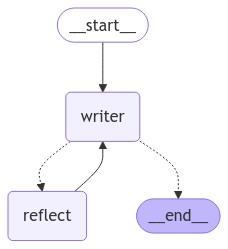

In [24]:
# 可视化图
from IPython.display import Image, display

try:
    display(
        Image(
            graph.get_graph(xray=True).draw_mermaid_png()
        )
    )
except Exception as e:
    print(f"Error generating graph: {e}")

In [25]:
from IPython.display import Markdown, display

# 定义装饰器，记录函数调用次数
def track_steps(func):
    step_counter = {'count': 0}  # 用于记录调用次数
    
    def wrapper(event, *args, **kwargs):
        # 增加调用次数
        step_counter['count'] += 1
        # 在函数调用之前打印 step
        display(Markdown(f"## Round {step_counter['count']}"))
        # 调用原始函数
        return func(event, *args, **kwargs)
    
    return wrapper

# 使用装饰器装饰 pretty_print_event_markdown 函数
@track_steps
def pretty_print_event_markdown(event):
    # 如果是生成写作部分
    if 'writer' in event:
        generate_md = "#### 回答生成:\n"
        for message in event['writer']['messages']:
            generate_md += f"- {message.content}\n"
        display(Markdown(generate_md))
    
    # 如果是反思评论部分
    if 'reflect' in event:
        reflect_md = "#### 评论反思:\n"
        for message in event['reflect']['messages']:
            reflect_md += f"- {message.content}\n"
        display(Markdown(reflect_md))

In [ ]:
content = “”

In [27]:
inputs = {
    "messages": [
        HumanMessage(content="")
    ],
}

config = {"configurable": {"thread_id": "1"}}

async for event in graph.astream(inputs, config):
    pretty_print_event_markdown(event)


## Round 8

#### 回答生成:
- 在比较数字时，通常会将其视为十进制数来进行比较。根据这一原则，我们来比较一下：

- 9.11
- 9.8

在十进制数中，整数部分相同的情况下，我们会比较小数部分。9.11的小数部分是0.11，而9.8的小数部分是0.8。

因为0.11小于0.8，所以9.11小于9.8。

因此，**9.8**比**9.11**大。


In [36]:
inputs = {
    "messages": [
        HumanMessage(content="中年老爷们最可悲的事情，是做了很多事情，最终只是感动了自己，以此为主题写一篇激荡情绪的文章")
    ],
}

config = {"configurable": {"thread_id": "2"}}

async for event in graph.astream(inputs, config):
    pretty_print_event_markdown(event)


## Round 9

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

或许，他们会选择放下那些沉重的负担，学会享受生活中的每一个小确幸。或许，他们会重新审视家庭关系，用心去感受亲情的温暖。或许，他们会找到一种新的生活方式，让自己在奋斗的同时，也能享受生活的美好。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。


## Round 10

#### 评论反思:
- ### 文章评审和建议

#### 优点：
1. **情感真实**：文章情感充沛，能够引起读者的共鸣。特别是对中年男性在家庭和事业之间的挣扎描写得十分细腻。
2. **结构清晰**：文章结构分明，从奋斗的初衷到现实的残酷，再到自我感动和觉醒，层次分明，逻辑清晰。
3. **语言简洁**：语言简洁明了，没有过多的冗余，表达了深刻的内涵。

#### 改进建议：

1. **增加具体实例**：
   - 当前文章多为概括性描述，缺乏具体的实例。可以通过增加一些具体的事例或故事，来增强文章的真实性和说服力。例如，可以描述一个具体的中年男性在某个特定情境下的奋斗和感动过程，这会让读者更容易代入情境。

2. **深化主题**：
   - 文章可以进一步探讨“自我感动”的深层次原因和影响。比如，为什么中年男性容易陷入自我感动的情境？这种情感对他们的心理和生活有何具体影响？这些问题可以通过分析和讨论来深化主题。

3. **增加引导性的结论**：
   - 目前的结论部分较为宽泛。可以增加一些具体的建议或引导性的结论，帮助中年男性更好地面对自己的情感和生活。比如，可以提供一些实际的应对策略或心态调整的方法。

4. **提升文学性**：
   - 尽管语言简洁明了，但可以尝试加入一些文学修辞手法，如比喻、排比等，以增加文章的文学色彩和感染力。

5. **篇幅调整**：
   - 文章整体篇幅适中，但可以考虑在某些段落进行扩展，特别是在描写具体情景和感动瞬间时，以增加文章的可读性和深度。

#### 结语：
总体来说，文章能够较好地表达主题，情感真挚，结构清晰。但为了使文章更加生动、深入和有吸引力，建议增加具体实例和深入分析，并在结论部分提供一些实际建议。这些改进将有助于增强文章的说服力和影响力。


## Round 11

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。

#### 提供实际建议：走出自我感动的困境

为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。


## Round 12

#### 评论反思:
- ### 文章评审和建议

#### 优点：
1. **情感真实**：文章情感充沛，能够引起读者的共鸣。特别是通过具体的人物“小李”的故事，更加生动地展现了主题。
2. **结构清晰**：文章结构分明，从奋斗的初衷到现实的残酷，再到自我感动和觉醒，层次分明，逻辑清晰。
3. **实际建议**：增加的实际建议部分非常有帮助，为读者提供了具体的行动指南，增强了文章的实用性。

#### 改进建议：

1. **进一步丰富人物故事**：
   - 虽然“小李”的故事已经很好地增强了文章的真实性，但可以进一步细化和丰富。例如，可以描述更多小李在家庭中的具体互动，或者他在工厂中的具体工作细节，这样可以让读者更深入地了解他的处境和感受。

2. **加强情感描写和心理活动**：
   - 在描述小李的故事时，可以增加更多的情感描写和心理活动。例如，小李在工厂事故后的心理变化，他在面对妻子抱怨时的内心挣扎，这些可以通过更细腻的描写来增强情感的深度。

3. **提升文学表现力**：
   - 可以尝试加入一些文学修辞手法，如比喻、排比、对比等，以增加文章的文学色彩和感染力。例如，在描述小李的奋斗时，可以使用一些比喻来形容他的辛劳和孤独。

4. **扩展结语部分**：
   - 结语部分可以进一步扩展，强调觉醒后的积极变化和未来的希望。例如，可以描述小李在觉醒后的具体行动和生活变化，这样可以让文章结尾更有力，更具激励性。

#### 具体改进示例：

##### 奋斗的初衷：为爱而战
年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

##### 现实的残酷：梦想的碰撞
然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

##### 自我感动：孤独的慰藉
在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

##### 从感动到觉醒：寻找新的方向
然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

##### 结语：无悔的岁月
中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Round 13

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

#### 提供实际建议：走出自我感动的困境

为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Round 14

#### 评论反思:
- ### 文章评审和建议

#### 优点：
1. **情感真实**：文章情感充沛，通过具体人物“小李”的故事，生动展现了主题，能够引起读者的共鸣。
2. **结构清晰**：文章结构较为分明，从奋斗的初衷到现实的残酷，再到自我感动和觉醒，层次清晰，逻辑顺畅。
3. **实际建议**：提供了具体的行动指南，具有实用性，增强了文章的指导意义。

#### 改进建议：

1. **进一步丰富人物故事**：
   - 虽然“小李”的故事已经很好地增强了文章的真实性，但可以进一步细化和丰富。例如，可以增加更多小李在家庭中的具体互动，或者他在工厂中的具体工作细节，这样可以让读者更深入地了解他的处境和感受。

2. **加强情感描写和心理活动**：
   - 在描述小李的故事时，可以增加更多的情感描写和心理活动。例如，小李在工厂事故后的心理变化，他在面对妻子抱怨时的内心挣扎，这些可以通过更细腻的描写来增强情感的深度。

3. **提升文学表现力**：
   - 可以尝试加入一些文学修辞手法，如比喻、排比、对比等，以增加文章的文学色彩和感染力。例如，在描述小李的奋斗时，可以使用一些比喻来形容他的辛劳和孤独。

4. **扩展结语部分**：
   - 结语部分可以进一步扩展，强调觉醒后的积极变化和未来的希望。例如，可以描述小李在觉醒后的具体行动和生活变化，这样可以让文章结尾更有力，更具激励性。

#### 具体改进示例：

##### 奋斗的初衷：为爱而战
年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

##### 现实的残酷：梦想的碰撞
然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

##### 自我感动：孤独的慰藉
在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

##### 从感动到觉醒：寻找新的方向
然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

##### 提供实际建议：走出自我感动的困境
为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

##### 结语：无悔的岁月
中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Round 15

#### 写作生成:
- ### 中年老爷们的自我感动：一曲无奈与热血的悲歌

在风雨交加的中年岁月里，许多老爷们常常陷入一种矛盾的境地：他们满怀激情地为家庭、事业和梦想而奋斗，却在某个静谧的夜晚，蓦然发现自己所做的一切，似乎只是感动了自己。

#### 奋斗的初衷：为爱而战

年轻时的他们，眼中闪烁着梦想的光芒，心中燃烧着不灭的激情。他们相信，通过自己的努力，可以为家人创造一个美好的未来。他们不惜夜以继日地工作，咬牙坚持，默默承受着压力与孤独。每一滴汗水、每一个不眠之夜，都饱含着对家庭的深情厚谊。

例如，小李是一位普通的中年男人，他在一家工厂上班，每天早出晚归，为的是能够让妻子和孩子过上更好的生活。每次看到孩子们开心地玩耍，他都会觉得自己的辛苦是值得的。他经常在凌晨四点起床，迎着晨曦出发，拖着疲惫的身躯回家时，夜幕早已降临。工厂的噪音和繁重的体力劳动，让他的双手布满老茧，但每当看到家人的笑脸，这些辛劳都变得值得。

#### 现实的残酷：梦想的碰撞

然而，现实往往比想象中更加残酷。尽管他们付出了无数的努力和心血，但结果却未必如人所愿。工作中的瓶颈、家庭琐事的纷扰，甚至是身体健康的逐渐衰退，都让他们感到力不从心。他们曾经以为，只要努力，就能换来幸福，然而，幸福却似乎离他们越来越远。

小李在一次工厂事故中受伤，虽然没有大碍，但却影响了他的工作效率。工厂对他的态度逐渐冷淡，甚至有了裁员的打算。家庭经济压力骤然增加，妻子也开始对他抱怨不断。这让小李陷入了深深的无力感和挫败感。他感到自己像是一块被时间磨损的石头，渐渐失去了光彩和价值。

#### 自我感动：孤独的慰藉

在一次次的失败与挫折中，他们渐渐学会了自我安慰。他们会在深夜独自一人，回顾自己走过的路，感叹自己的不易。或许，他们会在一段煽情的音乐中泪流满面，亦或是在一部励志电影中找到共鸣。然而，这种感动，终究只是感动了自己。他们的努力和牺牲，并未得到应有的回报和理解。

小李常常在深夜里独自一人，听着《朋友》，回想着自己这些年的辛苦和付出，泪水不禁涌上眼眶。他觉得自己就像歌中的主人公，一直在努力，却没有人理解他的辛劳。他会在深夜的阳台上，望着城市的灯火，心中充满了无尽的孤独和无奈。

#### 从感动到觉醒：寻找新的方向

然而，自我感动并非完全没有意义。它是一种情感的宣泄，也是一种内心的慰藉。更重要的是，它可以成为一种觉醒的力量。当他们意识到，生活不仅仅是为了感动自己，而是为了寻找真正的幸福和满足时，他们会重新审视自己的生活，寻找新的方向和目标。

小李在一次偶然的机会中，参加了一个心理咨询讲座，讲师的一句话深深触动了他：“只有当你真正爱自己时，你才能更好地去爱别人。”他开始反思自己的生活，决定在继续努力工作的同时，也要学会放松和享受生活。他开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。

#### 提供实际建议：走出自我感动的困境

为了帮助那些陷入自我感动的中年老爷们更好地面对自己的情感和生活，可以考虑以下几种方法：
1. **寻求专业帮助**：心理咨询或参加相关的心理讲座，可以帮助他们更好地理解自己的情感，并找到应对的方法。
2. **培养兴趣爱好**：通过发展新的兴趣爱好，如运动、阅读或旅行，可以缓解压力，提升生活的质量。
3. **改善家庭关系**：与家人进行有效的沟通，表达自己的感受和需求，共同面对生活中的困难。
4. **健康管理**：关注自己的身体健康，定期体检，保持良好的生活习惯。

#### 结语：无悔的岁月

中年老爷们的自我感动，是一曲无奈与热血的悲歌。然而，这首悲歌并非终点，而是他们人生中的一个转折点。当他们从自我感动中觉醒，重新找回生活的意义时，他们会发现，真正的幸福，原来一直在自己的心中。

小李开始每天抽出时间跑步，阅读自己喜欢的书籍，甚至学会了和孩子一起玩游戏。他发现，自己变得更加轻松和快乐，家庭关系也有所改善。在这条充满荆棘的道路上，他们无悔于自己的付出和努力。因为每一个感动的瞬间，都是他们生命中最真实的写照。无论前路如何，他们都会继续前行，带着那份深沉的爱与坚定的信念，走向更加美好的明天。

总之，通过增加具体实例、加强情感描写、提升文学表现力和扩展结语部分，文章将更加生动、深入和吸引人。继续加油，相信你能写出更精彩的文章！


## Homework: 

1. 扩展本指南的 Reflection Agent，使其能够完成更通用的生成任务，包括但不限于代码、报告等；
2. 使用扩展后的 Reflection Agent 生成代码，实现在 GitHubSentinel 上新增一个信息渠道。

### 如何让 Reflection `System Prompt` 更加通用：

如果你想让这个 `System Prompt` 适用于更广泛的内容评估场景，不局限于作文，你可以做一些轻微的调整。例如：

```python
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a reviewer tasked with providing constructive critique and improvement suggestions for the user's submission."
            " Offer detailed feedback, including recommendations on clarity, structure, content depth, and style, as well as areas for improvement.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
```

### 修改后的变化：
1. **角色定位更广泛**：从“老师”改为“审阅者”，这样不局限于评估作文，适用于各种类型的内容，包括文章、报告、甚至代码审查。
  
2. **批评与改进建议的灵活性**：从作文的“长度、深度、风格”拓展为“清晰度、结构、内容深度、风格”，这使得反馈更加多样化，适用于不同的内容类型。

通过这种方式，可以让模型在更多场景下提供高质量的评估和反馈。